In [1]:
import wisps
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
binar=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_templates.pkl').dropna()

In [3]:
#binar['system']=binar.spectrum.apply(wisps.classify, stripunits=True)

In [4]:
primary_spts=np.vstack(binar.primary.apply(lambda x: [wisps.make_spt_number(x[0]), wisps.make_spt_number(x[1])]).values)

In [5]:
system_spts=binar.system.apply(wisps.make_spt_number).values

In [6]:
df=pd.DataFrame()
df['prim']=primary_spts[:,0]
df['sec']=primary_spts[:,1]
df['sys']=system_spts

In [7]:
import seaborn as sns

In [8]:
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

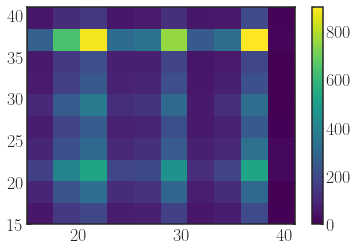

In [9]:
h=plt.hist2d(primary_spts[:,0], primary_spts[:,1], cmap='viridis')
cb=plt.colorbar()

In [10]:
df=(df[(df.prim<=df.sec) &( df.sys >15.)]).reset_index(drop=True).applymap(float)

In [11]:
#df['diff']=df.prim-df.sec

In [12]:
#df=(df[df.new_prim>=df.new_sec]).reset_index(drop=True).applymap(float)

In [13]:
df['diff']=df['prim']-df['sec']

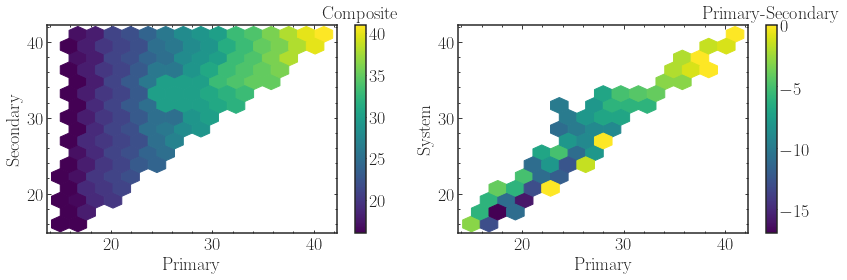

In [14]:
fig, (ax, ax1)=plt.subplots(figsize=(12,4), ncols=2)
df.plot.hexbin(x='prim', y='sec', C='sys', reduce_C_function=np.nanmedian, gridsize=15, cmap='viridis', ax=ax)
ax.set_xlabel('Primary', fontsize=18)
ax.set_ylabel('Secondary', fontsize=18)
#fig.axes[-1].set_title('Composite', fontsize=18)
#plt.tight_layout()

df.plot.hexbin(x='prim', y='sys', C='diff', reduce_C_function=np.nanmedian, gridsize=15, cmap='viridis', ax=ax1)
ax1.set_xlabel('Primary', fontsize=18)
ax1.set_ylabel('System', fontsize=18)


fig.axes[-2].set_title('Composite', fontsize=18)
fig.axes[-1].set_title('Primary-Secondary', fontsize=18)

ax1.minorticks_on()
ax.minorticks_on()

#for a in [ax, ax1]:
#ax.set_xticks([15, 20, 25, 30, 35, 40])
#ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
#ax.set_yticks([15, 20, 25, 30, 35, 40])
#ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    

#fig.axes[-2].set_yticks([15, 20, 25, 30, 35, 40])
#fig.axes[-2].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

#fig.axes[-1].set_yticks([15, 20, 25, 30, 35, 40])
#fig.axes[-1].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/composite_types.pdf', bbox_inches='tight')

In [15]:
df.to_pickle(wisps.OUTPUT_FILES+'/binary_lookup_table.pkl')

In [16]:
import astropy.units as u

In [17]:
(15*9)*(u.arcmin**2).to(u.deg**2)

0.0375

In [18]:
import wisps
import wisps.simulations as wispsim

In [19]:
pnts=wisps.OBSERVED_POINTINGS

In [20]:
x=pnts[0]

In [21]:
x.coord.galactic.b.value

59.495787863119425

In [22]:
wispnts=[x for x in pnts if x.survey !='hst3d']
hstpnts=[x for x in pnts if x.survey =='hst3d']

In [23]:
bs=np.array([x.coord.galactic.b.value for x in  wispnts ])
hstbs=np.array([x.coord.galactic.b.value for x in  hstpnts ])

In [24]:
np.nanmax(abs(bs))

87.75078520891377

In [25]:
np.nanmax(abs(hstbs))

60.109188219497874

In [26]:
exps=np.array([x.exposure_time for x in wispnts])
hstexps=np.array([x.exposure_time for x in hstpnts])

In [27]:
hstexps.min()

2506.0

In [28]:
hstexps.max()

6618.0

In [29]:
(wisps.POLYNOMIAL_RELATIONS['sp_F110W'])(17)

10.996833820082646

In [30]:
maglimits=pd.DataFrame([x.mag_limits for x in pnts])

In [31]:
maglimits.F140.median()

22.87523239307496

In [32]:
x.dist_limits[20]

[2623.1453636641386, 93.73064222224195]

In [33]:
x.dist_limits[30]

[881.102422128969, 31.20799667296117]

In [34]:
volumes=[]
dlimits=[]
for pnt in pnts:
    vs=[]
    dls=[]
    for g in wispsim.SPGRID:
        vsx=[]
        for h in wispsim.HS:
            vsx.append((pnt.volumes[h])[g])
        dls.append(pnt.dist_limits[g])
        vs.append(vsx)
    volumes.append(vs)
    dlimits.append(dls)
volumes=np.array(volumes)
dlimits=np.array(dlimits)

In [35]:
vs=np.nansum(volumes, axis=0)

In [36]:
wispsim.SPGRID[13]

30

In [37]:
volumes.shape

(533, 25, 7)

In [38]:
wispsim.HS

[100, 150, 200, 250, 300, 350, 400]

In [39]:
np.log10((vs[13][2])*4.1*(u.arcmin**2).to(u.radian**2))

3.3183354379427104